# Neural Network forestfires

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [2]:
forestfires = pd.read_csv("forestfires.csv")
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
#As dummy variables are already created, we will remove the month and alsoday columns
forestfires.drop(["month","day"],axis=1,inplace = True)

In [4]:
forestfires["size_category"].value_counts()


small    378
large    139
Name: size_category, dtype: int64

In [5]:
forestfires.isnull().sum().sum()


0

In [6]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
forestfires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [47]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


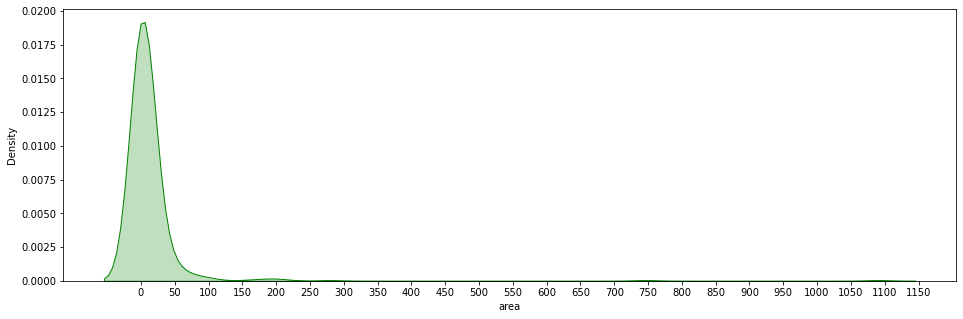

In [50]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forestfires['area'].skew()))
print("Kurtosis: {}".format(forestfires['area'].kurtosis()))
ax = sns.kdeplot(forestfires['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

# The Data is highly skewed and has large kurtosis value

### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [61]:
corr = forestfires[forestfires.columns[0:11]].corr()

<AxesSubplot:>

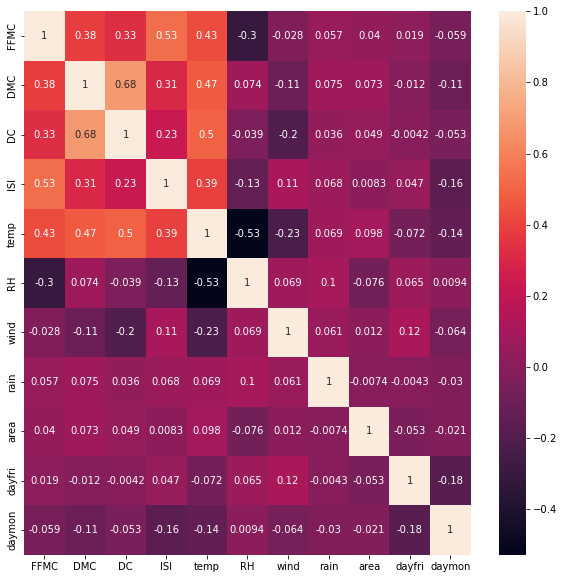

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Neural Network Model

In [8]:
# taking small as 1 and large as 0
label_encoder = preprocessing.LabelEncoder()


In [9]:
forestfires['size_category']= label_encoder.fit_transform(forestfires['size_category'])  

In [10]:
forestfires["size_category"].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [11]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min()) / (i.max() - i.min())
     return (x)

In [12]:
predictors = forestfires.iloc[:,0:28]

In [13]:
target = forestfires.iloc[:,28]

In [14]:
predictors1 = norm_func(predictors)

In [15]:
predictors1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)

In [17]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [18]:
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.array(x_train),np.array(y_train),epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
12/12 [==============================] - 1s 1ms/step - loss: 0.6675 - accuracy: 0.7313
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.7313
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.7313
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7313
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7313
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7313
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7313
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7313
Epoch 9/500
12/12 [==============================] - 0s 996us/step - loss: 0.5742 - accuracy: 0.7313
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7313
Epoch 1

12/12 [==============================] - 0s 769us/step - loss: 0.1078 - accuracy: 0.9529
Epoch 163/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.9529
Epoch 164/500
12/12 [==============================] - 0s 907us/step - loss: 0.0934 - accuracy: 0.9640
Epoch 165/500
12/12 [==============================] - 0s 1000us/step - loss: 0.1355 - accuracy: 0.9418
Epoch 166/500
12/12 [==============================] - 0s 997us/step - loss: 0.0827 - accuracy: 0.9751
Epoch 167/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9612
Epoch 168/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9695
Epoch 169/500
12/12 [==============================] - 0s 818us/step - loss: 0.1077 - accuracy: 0.9612
Epoch 170/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9778
Epoch 171/500
12/12 [==============================] - 0s 816us/step - loss: 0.0890 - accuracy

12/12 [==============================] - 0s 907us/step - loss: 0.0261 - accuracy: 0.9889
Epoch 323/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9972
Epoch 324/500
12/12 [==============================] - 0s 816us/step - loss: 0.0109 - accuracy: 0.9945
Epoch 325/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.9972
Epoch 326/500
12/12 [==============================] - 0s 818us/step - loss: 0.0507 - accuracy: 0.9778
Epoch 327/500
12/12 [==============================] - 0s 1000us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 328/500
12/12 [==============================] - 0s 909us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 329/500
12/12 [==============================] - 0s 816us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 330/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9723
Epoch 331/500
12/12 [==============================] - 0s 808us/step - loss: 0.0061 - accura

12/12 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 483/500
12/12 [==============================] - 0s 904us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 484/500
12/12 [==============================] - 0s 1ms/step - loss: 7.1594e-04 - accuracy: 1.0000
Epoch 485/500
12/12 [==============================] - 0s 997us/step - loss: 0.0157 - accuracy: 0.9945
Epoch 486/500
12/12 [==============================] - 0s 896us/step - loss: 0.0438 - accuracy: 0.9778
Epoch 487/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 488/500
12/12 [==============================] - 0s 818us/step - loss: 7.0716e-04 - accuracy: 1.0000
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 8.6394e-04 - accuracy: 1.0000
Epoch 490/500
12/12 [==============================] - 0s 907us/step - loss: 0.0399 - accuracy: 0.9834
Epoch 491/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 -

In [19]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [20]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [22]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

1    264
0     97
Name: size_category, dtype: int64

## For training data

In [23]:
train["original_class"] = "small"

In [24]:
train.loc[train["size_category"]==1,"original_class"] = "large"

In [25]:
train.original_class.value_counts()

large    264
small     97
Name: original_class, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_train_class,train["original_class"])

array([[264,   1],
       [  0,  96]], dtype=int64)

In [27]:
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) #100%

0.997229916897507

In [28]:
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,264,1
small,0,96


# For test data

In [29]:
pred_test = first_model.predict(np.array(x_test))

In [30]:
pred_test = pd.Series([i[0] for i in pred_test])

In [31]:
pred_test_class = pd.Series(["small"]*156)

In [32]:
pred_test_class[[i>0.5 for i in pred_test]] = "large"

In [33]:
test =pd.concat([x_test,y_test],axis=1)

In [34]:
test["original_class"]="small"

In [35]:
test.loc[test["size_category"]==1,"original_class"] = "large"

In [36]:
test["original_class"].value_counts()

large    114
small     42
Name: original_class, dtype: int64

In [37]:
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) # 85%

0.8974358974358975

In [43]:
confusion_matrix(pred_test_class,test["original_class"])

array([[109,  11],
       [  5,  31]], dtype=int64)

In [44]:
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,109,11
small,5,31


In [59]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1450      
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,331
Trainable params: 4,331
Non-trainable params: 0
_________________________________________________________________


In [55]:
predictions = first_model.predict(x_test)

In [57]:
predictions

array([[9.99999225e-01],
       [1.00000000e+00],
       [3.43104773e-07],
       [9.99999642e-01],
       [1.56071782e-03],
       [9.89571571e-01],
       [1.00000000e+00],
       [9.99997973e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99999642e-01],
       [9.98243868e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.25029812e-26],
       [3.30762565e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99997735e-01],
       [9.95161653e-01],
       [9.99998212e-01],
       [1.00000000e+00],
       [9.97745693e-01],
       [1.00000000e+00],
       [9.99996722e-01],
       [1.95025474e-01],
       [1.00000000e+00],
       [1.42289416e-35],
       [7.12697029e-01],
       [9.99998450e-01],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.45921588e-01],
       [1.00000000e+00],
       [4.01815291e-17],
       [1.27769171e-17],
